In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data=pd.read_csv('./IMDB Dataset.csv')
data=data.iloc[:10000]

In [11]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
data[data.duplicated()]

,review,sentiment
3537,Quite what the producers of this appalling ada...,negative
3769,My favourite police series of all time turns t...,positive
4391,"Beautiful film, pure Cassavetes style. Gena Ro...",positive
6352,If you liked the Grinch movie... go watch that...,negative
6479,I want very much to believe that the above quo...,negative
6672,Sigh. I'm baffled when I see a short like this...,negative
7221,"I have always been a huge fan of ""Homicide: Li...",positive
7222,There are plenty of comments already posted sa...,negative
7425,"The movie was excellent, save for some of the ...",positive
7555,This movie has made me upset! When I think of ...,negative


In [13]:
data.drop_duplicates(inplace=True)

In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sures\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
import re 

data['review']=data['review'].apply(lambda x:re.sub(re.compile('<.*?>')," ",x))
data['review']

0       One of the other reviewers has mentioned that ...
1       A wonderful little production.   The filming t...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
9995    Fun, entertaining movie about WWII German spy ...
9996    Give me a break. How can anyone say that this ...
9997    This movie is a bad movie. But after watching ...
9998    This is a movie that was probably made to ente...
9999    Smashing film about film-making. Shows the int...
Name: review, Length: 9983, dtype: object

In [15]:
import string
punctuations=string.punctuation
data['review'].apply(lambda x:[x for p in punctuations if x.replace(p,'')])

0       [One of the other reviewers has mentioned that...
1       [A wonderful little production.   The filming ...
2       [I thought this was a wonderful way to spend t...
3       [Basically there's a family where a little boy...
4       [Petter Mattei's "Love in the Time of Money" i...
                              ...                        
9995    [Fun, entertaining movie about WWII German spy...
9996    [Give me a break. How can anyone say that this...
9997    [This movie is a bad movie. But after watching...
9998    [This is a movie that was probably made to ent...
9999    [Smashing film about film-making. Shows the in...
Name: review, Length: 9983, dtype: object

In [16]:
reviews=data['review'].values

In [17]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

In [18]:
corpus=[]
stemer=PorterStemmer()
for i in range(0,len(reviews)):
    review=re.sub('[^a-zA-Z]',' ',reviews[i])
    review=review.lower()
    review=review.split()

    review=[stemer.stem(word) for word in review if not word in stopwords.words('english')] 
    
    review=' '.join(review)
    corpus.append(review)

In [19]:
corpus

['one review mention watch oz episod hook right exactli happen first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use word call oz nicknam given oswald maximum secur state penitentari focus mainli emerald citi experiment section prison cell glass front face inward privaci high agenda em citi home mani aryan muslim gangsta latino christian italian irish scuffl death stare dodgi deal shadi agreement never far away would say main appeal show due fact goe show dare forget pretti pictur paint mainstream audienc forget charm forget romanc oz mess around first episod ever saw struck nasti surreal say readi watch develop tast oz got accustom high level graphic violenc violenc injustic crook guard sold nickel inmat kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may becom comfort uncomfort view that get touch darker side',
 'won

In [20]:
data['review']=corpus

<Axes: xlabel='sentiment'>

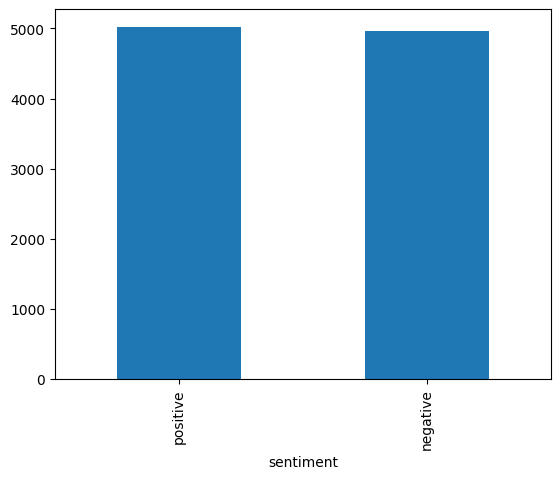

In [21]:
sentiment=data['sentiment']
sentiment.value_counts().plot.bar()

In [6]:
reviews=data['review']
sentiment=sentiment.map({'positive':1,'negative':0})
sentiment

0       1
1       1
2       1
3       0
4       1
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: sentiment, Length: 10000, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(reviews,sentiment,test_size = 0.2,random_state = 42)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
X_train_tf = tf.fit_transform(X_train).toarray()
X_test_tf = tf.transform(X_test).toarray()

In [9]:
y_train

9254    0
1561    1
1670    1
6087    1
6669    1
       ..
5734    1
5191    1
5390    0
860     1
7270    0
Name: sentiment, Length: 8000, dtype: int64

Model Building

--------------K-NearestNeighbors----------------
 
 Accuracy Score : 78.64999999999999 %

              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1002
           1       0.78      0.79      0.79       998

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.79      0.79      0.79      2000



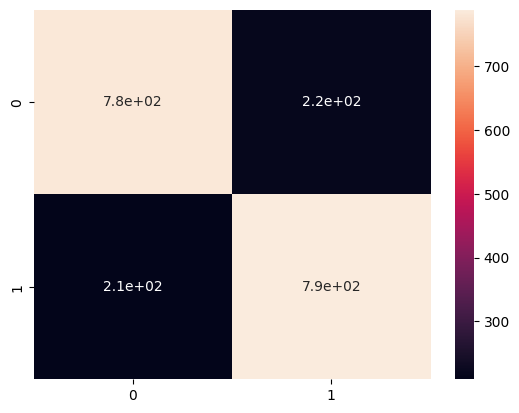

--------------DecisionTree----------------
 
 Accuracy Score : 71.6 %

              precision    recall  f1-score   support

           0       0.72      0.71      0.71      1002
           1       0.71      0.73      0.72       998

    accuracy                           0.72      2000
   macro avg       0.72      0.72      0.72      2000
weighted avg       0.72      0.72      0.72      2000



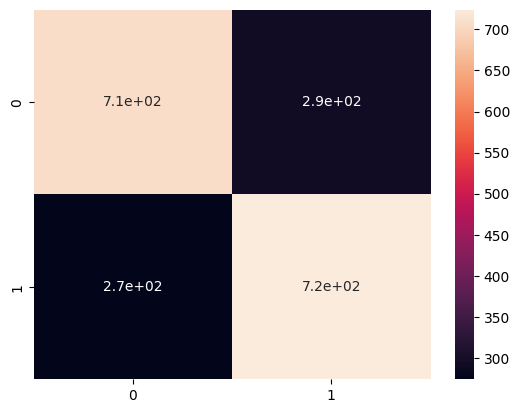

--------------RandomForest----------------
 
 Accuracy Score : 83.39999999999999 %

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1002
           1       0.83      0.84      0.83       998

    accuracy                           0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000



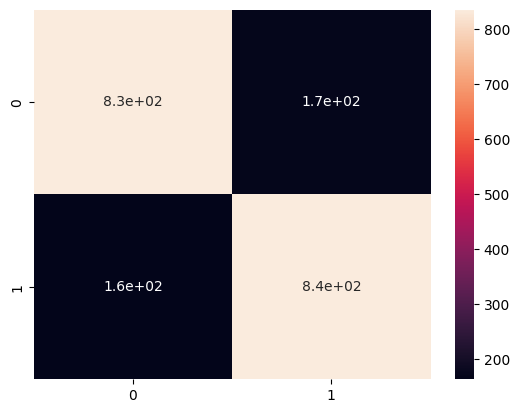

--------------LogisticRegression----------------
 
 Accuracy Score : 87.8 %

              precision    recall  f1-score   support

           0       0.89      0.86      0.88      1002
           1       0.87      0.89      0.88       998

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



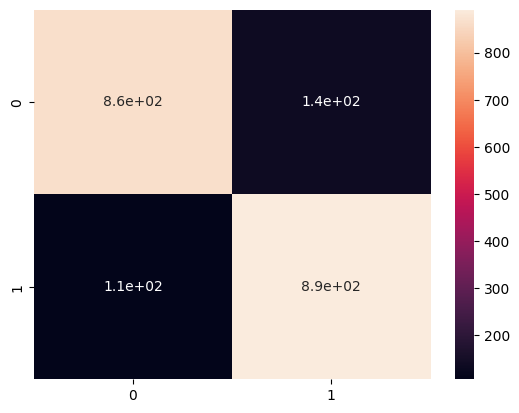

--------------NaiveBayes----------------
 
 Accuracy Score : 62.0 %

              precision    recall  f1-score   support

           0       0.60      0.70      0.65      1002
           1       0.64      0.54      0.58       998

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000



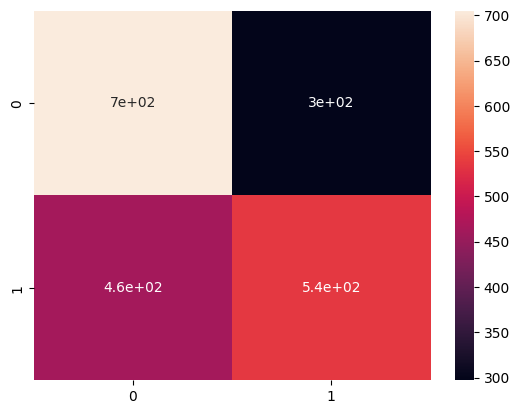

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

modelclasses=[
    ["K-NearestNeighbors",KNeighborsClassifier(n_neighbors=25)],
    ["DecisionTree",DecisionTreeClassifier()],
    ["RandomForest",RandomForestClassifier()],
    ["LogisticRegression",LogisticRegression()],
    ["NaiveBayes",GaussianNB()],
]
AccuracyScores=[]
# PrecisonScores=[]

for modelname,Model in modelclasses:        
        model=Model
        model.fit(X_train_tf,y_train)
        ypred=model.predict(X_test_tf)
        AccuracyScores.append((modelname,accuracy_score(y_test,ypred)*100))
        # PrecisonScores.append((modelname,precision_score(ytest,ypred)*100))
        print(f"--------------{modelname}----------------\n \n Accuracy Score : {accuracy_score(y_test,ypred)*100} %")
        print(f"\n{classification_report(y_test,ypred)}")
        sns.heatmap(confusion_matrix(y_test,ypred),annot=True)
        plt.show()


pd.DataFrame(AccuracyScore,column=['Model','Score'])

In [12]:
sentimentAnalysis=RandomForestClassifier()
sentimentAnalysis.fit(X_train_tf,y_train)

RandomForestClassifier()

Saving Model

In [19]:
import pickle
pickle.dump(sentimentAnalysis, open('model.pkl', 'wb'))

@Sureshkrishnan